# Load data and explore

In [1]:
import os
from pathlib import Path
from prophet import Prophet

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext lab_black

/Users/frankkelly/Library/Caches/pypoetry/virtualenvs/india-air-pollution-study-xopDDJl_-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iskaggle = os.environ.get("KAGGLE_KERNEL_RUN_TYPE", "")
if iskaggle:
    path = Path("../rohanrao/air-quality-data-in-india")
else:
    full_path = Path("rohanrao/air-quality-data-in-india")
    owner_slug = str(full_path).split("/")[0]
    dataset_slug = str(full_path).split("/")[1]
    path = Path(dataset_slug)
    if not path.exists():
        import zipfile, kaggle

        kaggle.api.datasets_download(owner_slug=owner_slug, dataset_slug=dataset_slug)

In [4]:
import zipfile

zipfile.ZipFile(f"{dataset_slug}.zip").extractall(dataset_slug)

In [5]:
import torch, numpy as np, pandas as pd

In [6]:
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option("display.width", 140)

In [7]:
df = pd.read_csv(path / "city_hour.csv")
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [8]:
df.dtypes

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [9]:
df.Datetime = pd.to_datetime(df.Datetime)
df.dtypes

City                  object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

In [10]:
df.isna().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [11]:
modes = df.mode().iloc[0]
modes

City                    Ahmedabad
Datetime      2020-03-11 09:00:00
PM2.5                        56.0
PM10                         94.0
NO                            2.0
NO2                           3.5
NOx                           0.0
NH3                          10.0
CO                            0.0
SO2                           5.5
O3                          16.48
Benzene                       0.0
Toluene                       0.0
Xylene                        0.0
AQI                         102.0
AQI_Bucket               Moderate
Name: 0, dtype: object

In [12]:
df.describe(include=(np.number))

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


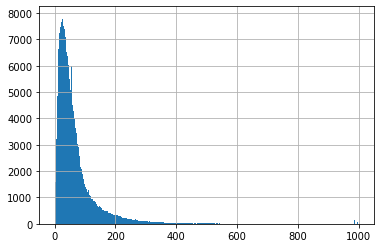

In [14]:
df["PM2.5"].hist(bins=1000)

In [15]:
df["LogPM2.5"] = np.log(df["PM2.5"] + 1)

<AxesSubplot:>

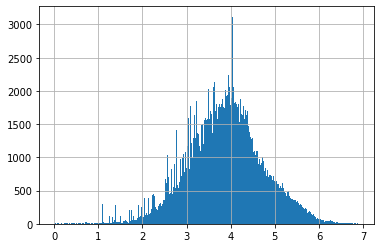

In [16]:
df["LogPM2.5"].hist(bins=1000)

In [18]:
cities = sorted(df.City.unique())
print(cities)

['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


In [20]:
df.describe(include=[object])

,City,AQI_Bucket
count,707875,578795
unique,26,6
top,Ahmedabad,Moderate
freq,48192,198991


In [21]:
delhi_df = df[df["City"] == "Delhi"]
delhi_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,LogPM2.5
245172,Delhi,2015-01-01 01:00:00,454.58,935.18,81.52,41.78,187.66,27.54,9.29,3.41,54.94,25.24,58.57,13.80,NaN,NaN,6.121571
245173,Delhi,2015-01-01 02:00:00,440.44,NaN,70.80,43.46,176.83,27.72,13.28,3.88,50.53,23.10,49.37,15.63,NaN,NaN,6.090042
245174,Delhi,2015-01-01 03:00:00,409.09,NaN,132.46,41.19,141.02,28.94,29.67,2.83,19.33,19.04,38.94,17.18,NaN,NaN,6.016377
245175,Delhi,2015-01-01 04:00:00,436.12,NaN,84.78,39.55,102.84,29.30,21.76,4.33,20.08,13.99,27.53,16.82,NaN,NaN,6.080208
245176,Delhi,2015-01-01 05:00:00,415.88,976.99,60.24,37.41,80.12,30.84,26.19,6.17,16.00,11.14,21.99,14.29,NaN,NaN,6.032798


In [22]:
delhi_df.isna().sum()

City              0
Datetime          0
PM2.5           375
PM10           2421
NO              298
NO2             330
NOx              25
NH3             980
CO              364
SO2            2852
O3             2201
Benzene          38
Toluene          26
Xylene        18904
AQI             498
AQI_Bucket      498
LogPM2.5        375
dtype: int64

In [23]:
modes = delhi_df.mode().iloc[0]
modes

City                        Delhi
Datetime      2015-01-01 01:00:00
PM2.5                        33.0
PM10                         10.0
NO                           9.22
NO2                          30.1
NOx                           0.0
NH3                          32.7
CO                            0.0
SO2                          9.86
O3                          29.02
Benzene                       0.0
Toluene                       0.0
Xylene                        0.0
AQI                          88.0
AQI_Bucket                   Poor
LogPM2.5                 3.526361
Name: 0, dtype: object

In [24]:
delhi_df.fillna(modes, inplace=True)

/var/folders/63/m20qx7592pb4b2zvqmy711qc0000gn/T/ipykernel_49886/4175830161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df.fillna(modes, inplace=True)


In [25]:
delhi_df["Datetime"].head()

245172   2015-01-01 01:00:00
245173   2015-01-01 02:00:00
245174   2015-01-01 03:00:00
245175   2015-01-01 04:00:00
245176   2015-01-01 05:00:00
Name: Datetime, dtype: datetime64[ns]

In [26]:
nobs = 9000
train = delhi_df[:-nobs]
test = delhi_df[-nobs:]

print(
    f"Length of dataframe: {len(delhi_df)}\n"
    f"Length of train set: {len(train)}\n"
    f"Length of test set: {len(test)}"
)

Length of dataframe: 48192
Length of train set: 39192
Length of test set: 9000


In [27]:
forecaster = Prophet()
forecaster.fit(train.rename(columns={"Datetime": "ds", "PM2.5": "y"}))

/Users/frankkelly/Library/Caches/pypoetry/virtualenvs/india-air-pollution-study-xopDDJl_-py3.9/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -898.526
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       85204.7    0.00193333       584.799           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       85286.3     0.0219645        2711.4           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         85340    0.00502447       1204.79      0.7464      0.7464      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       85354.4    0.00307467       1011.56      0.4574      0.4574      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       85398.2     0.0280656       671.235           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [44]:
print(train["Datetime"].head())
print(train["Datetime"].tail())

245172   2015-01-01 01:00:00
245173   2015-01-01 02:00:00
245174   2015-01-01 03:00:00
245175   2015-01-01 04:00:00
245176   2015-01-01 05:00:00
Name: Datetime, dtype: datetime64[ns]
284359   2019-06-21 20:00:00
284360   2019-06-21 21:00:00
284361   2019-06-21 22:00:00
284362   2019-06-21 23:00:00
284363   2019-06-22 00:00:00
Name: Datetime, dtype: datetime64[ns]


In [36]:
future = forecaster.make_future_dataframe(periods=int(nobs), freq="H")
future.head()

,ds
0,2015-01-01 01:00:00
1,2015-01-01 02:00:00
2,2015-01-01 03:00:00
3,2015-01-01 04:00:00
4,2015-01-01 05:00:00


In [37]:
future.tail()

,ds
48187,2020-06-30 20:00:00
48188,2020-06-30 21:00:00
48189,2020-06-30 22:00:00
48190,2020-06-30 23:00:00
48191,2020-07-01 00:00:00


In [29]:
forecast = forecaster.predict(future)

/Users/frankkelly/Library/Caches/pypoetry/virtualenvs/india-air-pollution-study-xopDDJl_-py3.9/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/frankkelly/Library/Caches/pypoetry/virtualenvs/india-air-pollution-study-xopDDJl_-py3.9/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [30]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,81.374827,144.501767,305.849408,81.374827,81.374827,144.032603,144.032603,144.032603,21.080192,...,2.464694,2.464694,2.464694,120.487716,120.487716,120.487716,0.0,0.0,0.0,225.407430
1,2015-01-01 02:00:00,81.395665,136.424579,306.352424,81.395665,81.395665,142.049122,142.049122,142.049122,18.959267,...,2.582563,2.582563,2.582563,120.507293,120.507293,120.507293,0.0,0.0,0.0,223.444787
2,2015-01-01 03:00:00,81.416503,142.522128,298.909755,81.416503,81.416503,139.975005,139.975005,139.975005,16.758412,...,2.690143,2.690143,2.690143,120.526450,120.526450,120.526450,0.0,0.0,0.0,221.391508
3,2015-01-01 04:00:00,81.437341,132.510402,299.855641,81.437341,81.437341,137.243965,137.243965,137.243965,13.911744,...,2.787032,2.787032,2.787032,120.545189,120.545189,120.545189,0.0,0.0,0.0,218.681306
4,2015-01-01 05:00:00,81.458178,136.487498,292.321875,81.458178,81.458178,134.000752,134.000752,134.000752,10.564330,...,2.872913,2.872913,2.872913,120.563510,120.563510,120.563510,0.0,0.0,0.0,215.458931


In [31]:
forecast.ds.describe()

/var/folders/63/m20qx7592pb4b2zvqmy711qc0000gn/T/ipykernel_49886/2228427570.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  forecast.ds.describe()


count                   48192
unique                  48192
top       2015-01-01 01:00:00
freq                        1
first     2015-01-01 01:00:00
last      2020-07-01 00:00:00
Name: ds, dtype: object

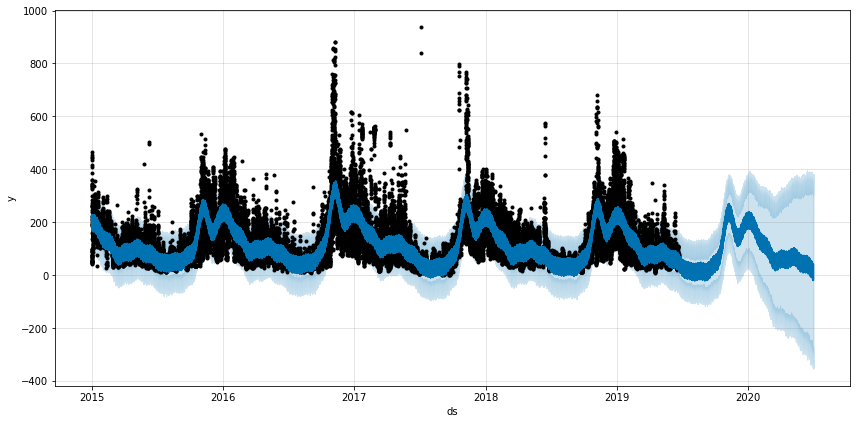

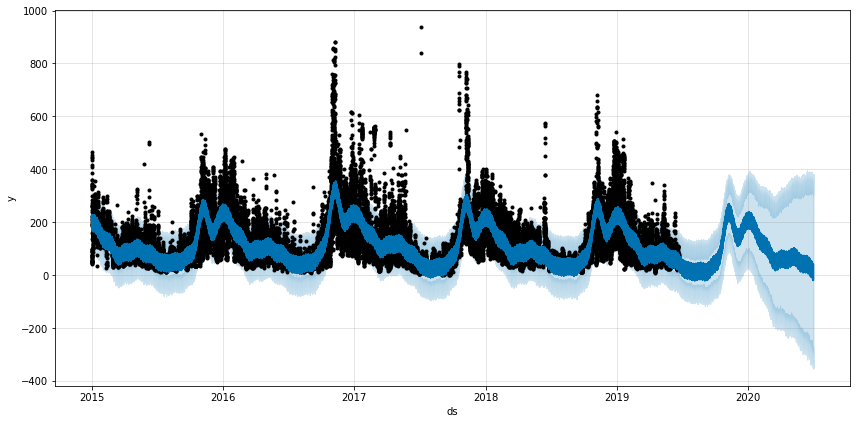

In [32]:
forecaster.plot(forecast, figsize=(12, 6))

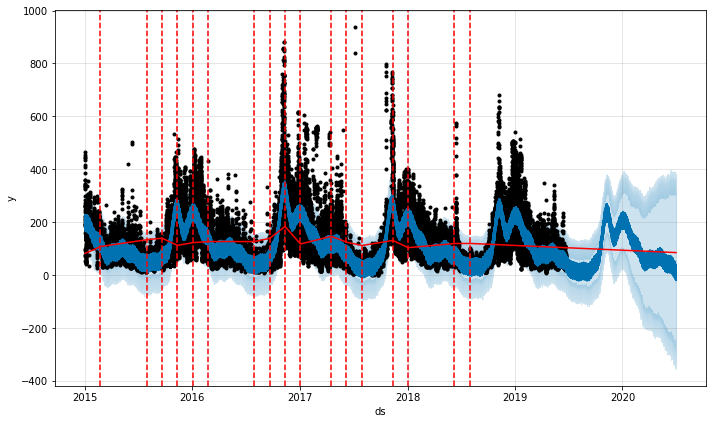

In [33]:
from prophet.plot import add_changepoints_to_plot

fig1 = forecaster.plot(forecast)

# viewing the points in time where the trajectory of the pollution index changed
a = add_changepoints_to_plot(fig1.gca(), forecaster, forecast)

## Comparing predictions to actual values

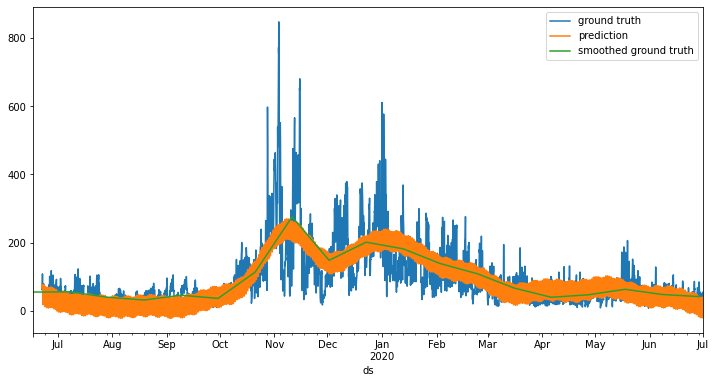

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
test.rename(columns={"Datetime": "ds", "PM2.5": "y"}).set_index(keys=["ds"])["y"].plot()
forecast.set_index(keys=["ds"]).iloc[-nobs:, :]["yhat"].plot()
test.rename(columns={"Datetime": "ds", "PM2.5": "y"}).set_index(keys=["ds"])[
    "y"
].resample("3W").mean().plot()

ax.legend(["ground truth", "prediction", "smoothed ground truth"])

In [ ]:
#TODO: take single year's data, make prediction, then 2 years etc. (which timespan gives best prediction?)
#TODO: try a prediction for 2023 (each Indian city)
# consdier location in country also

# External datasets as well - wind speed / direction & temperature
# Which method performs best with Pollution data
# Which metrics to use to find which method perform the best